In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

## Fetch the data and load it in pandas

In [2]:
import os
from urllib.request import urlretrieve

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases"
       "/adult/adult.data")
local_filename = os.path.basename(url)
if not os.path.exists(local_filename):
    print("Downloading Adult Census datasets from UCI")
    urlretrieve(url, local_filename)

In [3]:
names = ("age, workclass, fnlwgt, education, education-num, "
         "marital-status, occupation, relationship, race, sex, "
         "capital-gain, capital-loss, hours-per-week, "
         "native-country, income").split(', ')    
data = pd.read_csv(local_filename, names=names)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [6]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.groupby('occupation').size().nlargest(10)

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
dtype: int64

In [8]:
data.groupby('native-country').size().nlargest(10)

native-country
 United-States    29170
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
 Cuba                95
dtype: int64

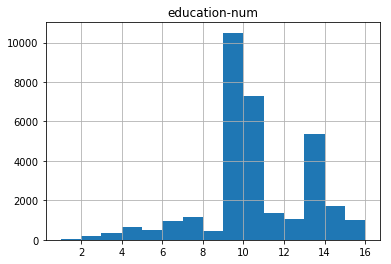

In [9]:
data.hist(column='education-num', bins=15);

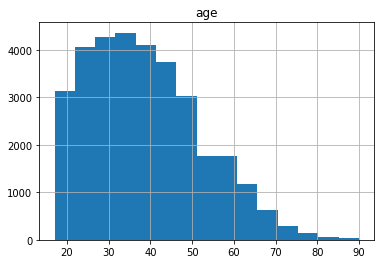

In [10]:
data.hist(column='age', bins=15);

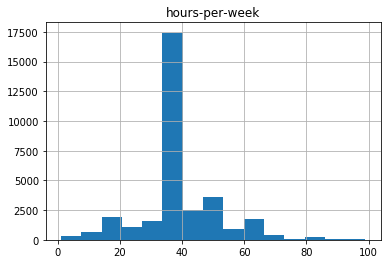

In [11]:
data.hist('hours-per-week', bins=15);

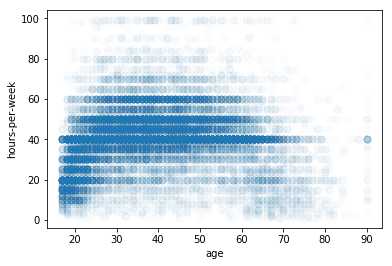

In [12]:
data.plot(x='age', y='hours-per-week', kind='scatter',
          alpha=0.02, s=50);

In [13]:
data.groupby('income')['income'].count()

income
 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [14]:
np.mean(data['income'] == ' >50K')

0.2408095574460244

In [15]:
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
data = data.dropna()

In [17]:
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
target_names = data['income'].unique()
target_names

array([' <=50K', ' >50K'], dtype=object)

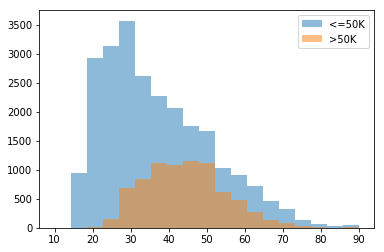

In [19]:
low_income = data[data['income'] == ' <=50K']
high_income = data[data['income'] == ' >50K']

bins = np.linspace(10, 90, 20)
plt.hist(low_income['age'].values, bins=bins, alpha=0.5, label='<=50K')
plt.hist(high_income['age'].values, bins=bins, alpha=0.5, label='>50K')
plt.legend(loc='best');

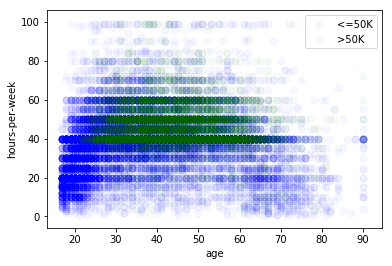

In [20]:
plt.scatter(low_income['age'], low_income['hours-per-week'],
            alpha=0.03, s=50, c='b', label='<=50K');
plt.scatter(high_income['age'], high_income['hours-per-week'],
            alpha=0.03, s=50, c='g', label='>50K');
plt.legend()
plt.xlabel('age'); plt.ylabel('hours-per-week');

## Feature Engineering for predictive models

### Manual feature engineering with pandas

In [21]:
target = data['income']
features_data = data.drop('income', axis=1)

In [22]:
numeric_features = [c for c in features_data if features_data[c].dtype.kind in ('i', 'f')]
numeric_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [23]:
numeric_data = features_data[numeric_features]
numeric_data.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [24]:
categorical_features = [c for c in features_data if features_data[c].dtype.kind not in ('i', 'f')]
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [25]:
categorical_data = features_data[categorical_features]
categorical_data.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [26]:
categorical_data_encoded = categorical_data.apply(lambda x: pd.factorize(x)[0])
categorical_data_encoded.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0
2,2,1,2,2,0,0,0,0
3,2,2,1,2,1,1,0,0
4,2,0,1,3,2,1,1,1


In [27]:
features = pd.concat([categorical_data_encoded, numeric_data], axis=1)
features.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,0,0,39,77516,13,2174,0,40
1,1,0,1,1,1,0,0,0,50,83311,13,0,0,13
2,2,1,2,2,0,0,0,0,38,215646,9,0,0,40
3,2,2,1,2,1,1,0,0,53,234721,7,0,0,40
4,2,0,1,3,2,1,1,1,28,338409,13,0,0,40


In [28]:
# Alternatively: use one-hot encoding for categorical features
# features = pd.get_dummies(features_data)
# features.head()

In [29]:
X = features.values.astype(np.float32)
y = (target.values == ' >50K').astype(np.int32)

In [30]:
X.shape

(32561, 14)

In [31]:
X

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [2.0000e+00, 1.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [2.0000e+00, 1.0000e+00, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [2.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [6.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]], dtype=float32)

### Feature engineering using sklearn

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import CategoricalEncoder


feature_preprocessor = make_column_transformer(
    (categorical_features, CategoricalEncoder(encoding='ordinal')),
    remainder='passthrough'
)

X = feature_preprocessor.fit_transform(features)

In [33]:
X.shape

(32561, 14)

## Training a first Decision Tree model

In [34]:
from sklearn.model_selection import train_test_split

features_train, features_test, X_train, X_test, y_train, y_test = train_test_split(
    features, X, y, test_size=0.2, random_state=0)

In [35]:
X_train.shape

(26048, 14)

In [36]:
X_test.shape

(6513, 14)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(max_depth=8)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
print("ROC AUC Decision Tree: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

ROC AUC Decision Tree: 0.8963 +/-0.0032


## Model error analysis

In [38]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, X, y, ylim=(0, 1.1), cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),
                        scoring=None):
    plt.title("Learning curves for %s" % type(estimator).__name__)
    plt.ylim(*ylim); plt.grid()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    print("Best validation score: {:.4f}".format(validation_scores_mean[-1]))

Best validation score: 0.7479


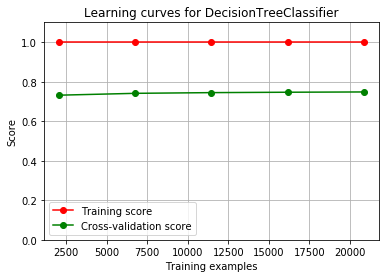

In [39]:
clf = DecisionTreeClassifier(max_depth=None)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8590


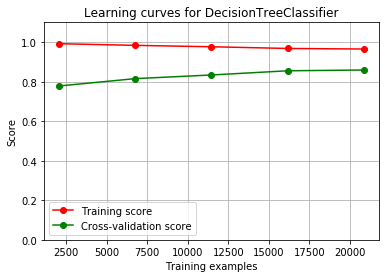

In [40]:
clf = DecisionTreeClassifier(max_depth=15)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8965


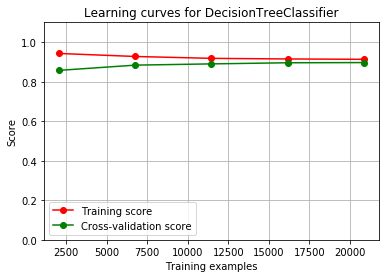

In [41]:
clf = DecisionTreeClassifier(max_depth=8)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

Best validation score: 0.8636


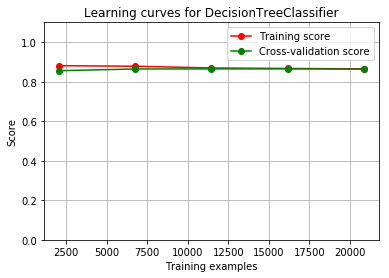

In [42]:
clf = DecisionTreeClassifier(max_depth=4)
plot_learning_curve(clf, X_train, y_train, scoring='roc_auc')

In [43]:
from sklearn.model_selection import validation_curve


def plot_validation_curve(estimator, X, y, param_name, param_range,
                          ylim=(0, 1.1), cv=5, n_jobs=-1, scoring=None):
    estimator_name = type(estimator).__name__
    plt.title("Validation curves for %s on %s"
              % (param_name, estimator_name))
    plt.ylim(*ylim); plt.grid()
    plt.xlim(min(param_range), max(param_range))
    plt.xlabel(param_name)
    plt.ylabel("Score")

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name, param_range,
        cv=cv, n_jobs=n_jobs, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.semilogx(param_range, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.semilogx(param_range, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    print("Best test score: {:.4f}".format(test_scores_mean[-1]))

Best test score: 0.7502


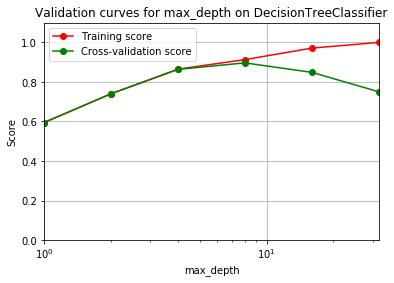

In [44]:
clf = DecisionTreeClassifier(max_depth=8)
param_name = 'max_depth'
param_range = [1, 2, 4, 8, 16, 32]

plot_validation_curve(clf, X_train, y_train,
                      param_name, param_range, scoring='roc_auc')

## Gradient Boosted Decision Trees

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_features=10,
                             max_depth=10)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc',
                         n_jobs=-1)
print("ROC Random Forest: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

ROC Random Forest: 0.9142 +/-0.0028


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(max_leaf_nodes=5, learning_rate=0.1,
                                 n_estimators=100)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc',
                         n_jobs=-1)
print("ROC AUC Gradient Boosted Trees: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

ROC AUC Gradient Boosted Trees: 0.9183 +/-0.0030


## Evaluation of the best model

In [47]:
%%time
_ = clf.fit(X_train, y_train)

CPU times: user 2.21 s, sys: 4 ms, total: 2.22 s
Wall time: 2.22 s


In [48]:
from sklearn.metrics import roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]
print("ROC AUC: %0.4f" % roc_auc_score(y_test, y_pred_proba))

ROC AUC: 0.9164


In [49]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

      <=50K       0.88      0.95      0.91      4918
       >50K       0.78      0.59      0.67      1595

avg / total       0.85      0.86      0.85      6513



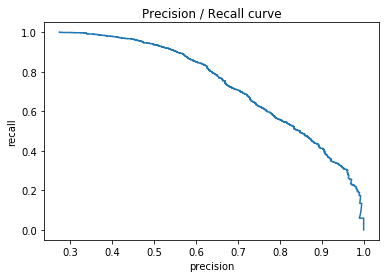

In [50]:
from sklearn.metrics import precision_recall_curve

precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_pred_proba)

plt.plot(precision_gb, recall_gb)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision / Recall curve');

## Variable importances

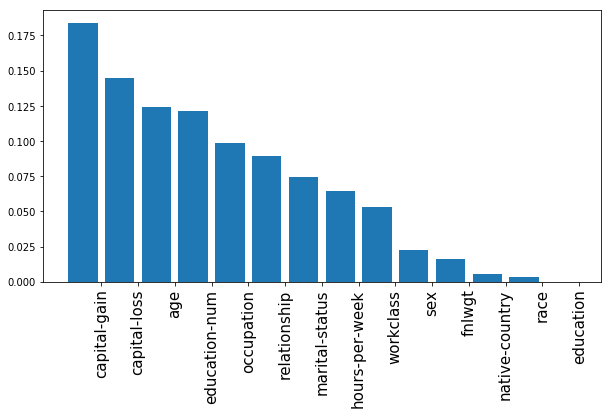

In [51]:
plt.figure(figsize=(10, 5))

ordering = np.argsort(clf.feature_importances_)[::-1]

importances = clf.feature_importances_[ordering]
feature_names = features.columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

## Using the boosted trees to extract features for a Logistic Regression model

The following is an implementation of a trick found in:

Practical Lessons from Predicting Clicks on Ads at Facebook
Junfeng Pan, He Xinran, Ou Jin, Tianbing XU, Bo Liu, Tao Xu, Yanxin Shi, Antoine Atallah, Ralf Herbrich, Stuart Bowers, Joaquin Quiñonero Candela
International Workshop on Data Mining for Online Advertising (ADKDD)

https://www.facebook.com/publications/329190253909587/

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from scipy.sparse import hstack


class TreeTransform(BaseEstimator, TransformerMixin):
    """One-hot encode samples with an ensemble of trees
    
    This transformer first fits an ensemble of trees (e.g. gradient
    boosted trees or a random forest) on the training set.

    Then each leaf of each tree in the ensembles is assigned a fixed
    arbitrary feature index in a new feature space. If you have 100
    trees in the ensemble and 2**3 leafs per tree, the new feature
    space has 100 * 2**3 == 800 dimensions.
    
    Each sample of the training set go through the decisions of each tree
    of the ensemble and ends up in one leaf per tree. The sample if encoded
    by setting features with those leafs to 1 and letting the other feature
    values to 0.
    
    The resulting transformer learn a supervised, sparse, high-dimensional
    categorical embedding of the data.
    
    This transformer is typically meant to be pipelined with a linear model
    such as logistic regression, linear support vector machines or
    elastic net regression.
    
    """

    def __init__(self, estimator):
        self.estimator = estimator
        
    def fit(self, X, y):
        self.fit_transform(X, y)
        return self
        
    def fit_transform(self, X, y):
        self.estimator_ = clone(self.estimator)
        self.estimator_.fit(X, y)
        self.binarizers_ = []
        sparse_applications = []
        estimators = np.asarray(self.estimator_.estimators_).ravel()
        for t in estimators:
            lb = LabelBinarizer(sparse_output=True)
            X_leafs = t.tree_.apply(X.astype(np.float32))
            sparse_applications.append(lb.fit_transform(X_leafs))
            self.binarizers_.append(lb)
        return hstack(sparse_applications)
        
    def transform(self, X, y=None):
        sparse_applications = []
        estimators = np.asarray(self.estimator_.estimators_).ravel()
        for t, lb in zip(estimators, self.binarizers_):
            X_leafs = t.tree_.apply(X.astype(np.float32))
            sparse_applications.append(lb.transform(X_leafs))
        return hstack(sparse_applications)


boosted_trees = GradientBoostingClassifier(
    max_leaf_nodes=5, learning_rate=0.1,
    n_estimators=100, random_state=0,
) 

pipeline = make_pipeline(
    TreeTransform(boosted_trees),
    LogisticRegression(C=1)
)

pipeline.fit(X_train, y_train);

In [53]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
print("ROC AUC: %0.4f" % roc_auc_score(y_test, y_pred_proba))

ROC AUC: 0.9233


In [54]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

      <=50K       0.89      0.93      0.91      4918
       >50K       0.76      0.66      0.70      1595

avg / total       0.86      0.86      0.86      6513



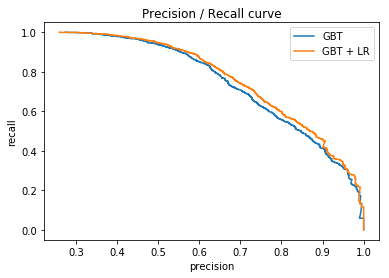

In [55]:
from sklearn.metrics import precision_recall_curve

precision_gb_lr, recall_gb_lr, _ = precision_recall_curve(
    y_test, y_pred_proba)

plt.plot(precision_gb, recall_gb, label='GBT')
plt.plot(precision_gb_lr, recall_gb_lr, label='GBT + LR')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision / Recall curve')
plt.legend();

## Cross-validation of a complete pipeline from the raw features

In this final example, we will fit a simpler baseline model (logistic regression) wrapped into a pipeline that includes both feature engineering and supervised learning in one go.

In [56]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import CategoricalEncoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


pipeline = make_pipeline(
    make_column_transformer(
        (categorical_features, CategoricalEncoder(encoding='onehot',
                                                  handle_unknown='ignore')),
        (numeric_features, StandardScaler()),
    ),
    LogisticRegression(C=1000),
)

cv_scores = cross_val_score(pipeline, features_train, y_train,
                            scoring='roc_auc', cv=5, n_jobs=-1)
cv_scores

array([0.91093865, 0.91035191, 0.90915338, 0.90166052, 0.9014367 ])

In [57]:
print("ROC AUC Logistic Regression pipeline: {:.4f} +/-{:.4f}".format(
    np.mean(cv_scores), np.std(cv_scores)))

ROC AUC Logistic Regression pipeline: 0.9067 +/-0.0043


Retrain the same pipeline on the full training set for final evaluation on the test set

In [58]:
pipeline.fit(features_train, y_train)
y_pred_proba = pipeline.predict_proba(features_test)[:, 1]
print("ROC AUC: %0.4f" % roc_auc_score(y_test, y_pred_proba))

ROC AUC: 0.9042


The final test score is in-line with the results of cross-validation done on the training set.